# DSRM_REPORT2_PAMAP2 Physical Activity Monitoring Data Analysis

# Report Content:

## 1.Introduction                         
## 2.Exploratory Data Analysis
## 3.Hypothesis Testing            
## 4.Predictive Modeling

# 1.Introduction:

New software/hardware, which detects the activity of the individual is performing. The Data science research method will be used to get insights into different properties of activities. We will use the PAMAP2 Physical Activity Monitoring dataset to do this. This dataset contains 18 physical activities, which will display later in the report. These physical activities are performed by the 9 subjects(8 males and 1 female, according to the Subject Information file) with the help of 3 Colibri wireless IMUs(Inertial Measurement Units) and 1 HR monitor (Heart Rate Monitor). These IMU sensors are positioned over the wrist on the dominant arm(hand), chest, and the dominant side's ankle. All 9 subjects follow the protocol, and data is available in the .dat file. Details about this data will be found in the DataCollectionProtocol file. This protocol contains the 12 different activities and the list of optional activities for the individual, so we have 18 performed activities available, which can be seen in the DescriptionOfActivities file. By completing the analysis of the protocol data, we can showcase how the individual is active based on physical activities.


In this report,

We will be performing the data-cleaning and data-loading process to make the data set ready for analysis. With the help of exploratory data analysis and hypothesis testing, extracts the best insights by using specific variables, which include the heart rate, temperature, and acceleration of an individual. Then modeling, the continuous variables such as heart rate and hand temperature through Multivariate linear regression, building the model to detect the activity performed based on the given input.

To work on this data analysis, we need to import python libraries to this Jupyter notebook, and it is as follows:

In [1]:
#standard python libraries to work on data in this report.
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

 # 2.Exploratory Data Analysis:

By importing all the libraries by running the above code cell, we are ready to perform the thorough exploratory data analysis by reading the subject file, which can be available in the folder protocol under the PAMAP2_dataset.

In [2]:
#Loading the data into jupyter notebook to perform the analysis

#We have a total of 9 subject data files, and I will append data after taking all the files into one list called subject_file.
subject_files=   ['PAMAP2_Dataset/Protocol/subject101.dat',
                 'PAMAP2_Dataset/Protocol/subject102.dat',  
                 'PAMAP2_Dataset/Protocol/subject103.dat',
                 'PAMAP2_Dataset/Protocol/subject104.dat',
                 'PAMAP2_Dataset/Protocol/subject105.dat',
                 'PAMAP2_Dataset/Protocol/subject106.dat',
                 'PAMAP2_Dataset/Protocol/subject107.dat',
                 'PAMAP2_Dataset/Protocol/subject108.dat',
                 'PAMAP2_Dataset/Protocol/subject109.dat' ] 

#we have total 54 columns and data file don't have column header so i will be defining column names by referring readme file.
general_columns=[
             'timestamp','activityID','heart_rate', #general columns
             ]
     
hand=['handtemperature',
             'IMU_handAcc_16_X(ms-2)','IMU_handAcc_16_Y(scale)','IMU_handAcc_16_Z(resolution)',
             'IMU_handAcc_6_X(ms-2)','IMU_handAcc_6_Y(scale)','IMU_handAcc_6_Z(resolution)',              
             'IMU_handGyro_X','IMU_handGyro_Y','IMU_handGyro_Z',                  #IMU hand columns
             'IMU_handMagneto_X','IMU_handMagneto_Y','IMU_handMagneto_Z',
             'IMU_handOrientation1', 'IMU_handOrientation2', 'IMU_handOrientation3', 'IMU_handOrientation4',
              ]
chest=[
             'chesttemperature',
             'IMU_chestAcc_16_X(ms-2)','IMU_chestAcc_16_Y(scale)','IMU_chestAcc_16_Z(resolution)',
             'IMU_chestAcc_6_X(ms-2)','IMU_chestAcc_6_Y(scale)','IMU_chestAcc_6_Z(resolution)',
             'IMU_chestGyro_X','IMU_chestGyro_Y','IMU_chestGyro_Z',               #IMU chest columns
             'IMU_chestMagneto_X','IMU_chestMagneto_Y','IMU_chestMagneto_Z',
             'IMU_chestOrientation1', 'IMU_chestOrientation2', 'IMU_chestOrientation3', 'IMU_chestOrientation4',
             ]
ankle=[
             'ankletemperature',
             'IMU_ankleAcc_16_X(ms-2)','IMU_ankleAcc_16_Y(scale)','IMU_ankleAcc_16_Z(resolution)',
             'IMU_ankleAcc_6_X(ms-2)','IMU_ankleAcc_6_Y(scale)','IMU_ankleAcc_6_Z(resolution)',              
             'IMU_ankleGyro_X','IMU_ankleGyro_Y','IMU_ankleGyro_Z',                  #IMU ankle columns
             'IMU_ankleMagneto_X','IMU_ankleMagneto_Y','IMU_ankleMagneto_Z',
             'IMU_ankleOrientation1', 'IMU_ankleOrientation2', 'IMU_ankleOrientation3', 'IMU_ankleOrientation4',
             ] 
    
columns= general_columns+hand+chest+ankle #merging all the lists into one list

subjectID=[1,2,3,4,5,6,7,8,9]  # Subject id from subject information file

#maping the activities to respictive values using dictionary in python by refering readme file
activity_ID={1:'lying',2:'sitting',3:'standing',4:'walking',5:'running',6:'cycling',7:'Nordic walking',9:'watching TV',
             10:'computer work',11:'car driving',12:'ascending stairs',13:'descending stairs',16:'vacuum cleaning',
             17:'ironing',18:'folding laundry',19:'house cleaning',20:'playing soccer',24:'rope jumping',0:'other'}

len(columns) # shows the count of columns in output

54

In [3]:
df = pd.DataFrame()
temp=[]
for file in subject_files:
    data = pd.read_csv(file, header=None, sep='\s+') #read the all dat file data
    data.columns = columns
    data['subjectID']=int(file[-5])
    temp.append(data)
    df=pd.concat(temp)
df.head()

,timestamp,activityID,heart_rate,handtemperature,IMU_handAcc_16_X(ms-2),IMU_handAcc_16_Y(scale),IMU_handAcc_16_Z(resolution),IMU_handAcc_6_X(ms-2),IMU_handAcc_6_Y(scale),IMU_handAcc_6_Z(resolution),...,IMU_ankleGyro_Y,IMU_ankleGyro_Z,IMU_ankleMagneto_X,IMU_ankleMagneto_Y,IMU_ankleMagneto_Z,IMU_ankleOrientation1,IMU_ankleOrientation2,IMU_ankleOrientation3,IMU_ankleOrientation4,subjectID
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


From the above table, we can see the preview of the data after the merging of all the subject files. after checking the sample data,will be continuing with the data-cleaning process.

In [4]:
df = df[df['activityID']!=0] #Filtering/eliminating the 0 values from activityID column to not include in the analysis


Eliminating the 0 from the activityID column for further analysis since this 0 are the transitory measurements of subjects between activities.

The next step is to drop the orientation columns from the data frame since these columns are invalid(invalid in this data collection: ref readme file).

In [5]:
df=df.drop(['IMU_handOrientation1', 'IMU_handOrientation2', 'IMU_handOrientation3', 'IMU_handOrientation4',       #dropping columns since its invalid
            'IMU_chestOrientation1', 'IMU_chestOrientation2', 'IMU_chestOrientation3', 'IMU_chestOrientation4',
           'IMU_ankleOrientation1', 'IMU_ankleOrientation2', 'IMU_ankleOrientation3', 'IMU_ankleOrientation4'],axis=1)

In [6]:
df.head() # previewing the data

,timestamp,activityID,heart_rate,handtemperature,IMU_handAcc_16_X(ms-2),IMU_handAcc_16_Y(scale),IMU_handAcc_16_Z(resolution),IMU_handAcc_6_X(ms-2),IMU_handAcc_6_Y(scale),IMU_handAcc_6_Z(resolution),...,IMU_ankleAcc_6_X(ms-2),IMU_ankleAcc_6_Y(scale),IMU_ankleAcc_6_Z(resolution),IMU_ankleGyro_X,IMU_ankleGyro_Y,IMU_ankleGyro_Z,IMU_ankleMagneto_X,IMU_ankleMagneto_Y,IMU_ankleMagneto_Z,subjectID
2928,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
2929,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2930,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
2931,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1


In [7]:
df.isnull().values.any() #this will checks the NaN values/null values on entire dataframe

True

Above code runs and shows us the presence of NaN/Null values in the dataframe so later we can find the count of null values in each columns by running the below code.

In [8]:
df.isnull().sum()  #count of nulls in each column

timestamp                              0
activityID                             0
heart_rate                       1765464
handtemperature                    11124
IMU_handAcc_16_X(ms-2)             11124
IMU_handAcc_16_Y(scale)            11124
IMU_handAcc_16_Z(resolution)       11124
IMU_handAcc_6_X(ms-2)              11124
IMU_handAcc_6_Y(scale)             11124
IMU_handAcc_6_Z(resolution)        11124
IMU_handGyro_X                     11124
IMU_handGyro_Y                     11124
IMU_handGyro_Z                     11124
IMU_handMagneto_X                  11124
IMU_handMagneto_Y                  11124
IMU_handMagneto_Z                  11124
chesttemperature                    2420
IMU_chestAcc_16_X(ms-2)             2420
IMU_chestAcc_16_Y(scale)            2420
IMU_chestAcc_16_Z(resolution)       2420
IMU_chestAcc_6_X(ms-2)              2420
IMU_chestAcc_6_Y(scale)             2420
IMU_chestAcc_6_Z(resolution)        2420
IMU_chestGyro_X                     2420
IMU_chestGyro_Y 

As observed above, we have more values missing in the heart_rate column, and imputing these values may lead to significant bias. But this is may be a significant predictor of the activity being performed and the primary goals for this analysis.

Let's plot the heart rate change distribution for Median, Mean, and Removal imputational strategies.

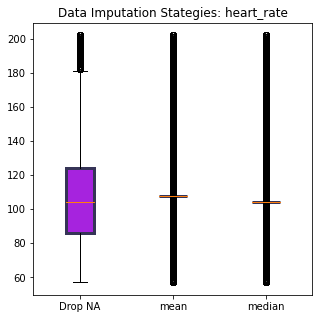

In [9]:
import matplotlib.pyplot as plt
def impute(variables):    #function to plot the box plot with imputational strategy applied(mean,median and removal NA)
    fig= plt.figure(1,figsize=(5,5))
    i = 111
    for variable in variables:
        ax=fig.add_subplot(i)
        bp = ax.boxplot([df[variable].dropna(),df[variable].fillna(df[variable].mean()),\
        df[variable].fillna(df[variable].median())],patch_artist=True)
        for bx in bp['boxes']:
            bx.set(color='#363457',linewidth=3)
            bx.set(facecolor='#a623de')
        for whisker in bp['whiskers']:
            plt.title('Data Imputation Stategies: %s' %variable)
            ax.set_xticklabels(['Drop NA','mean','median'])
            i += 1
        return
impute(['heart_rate'])  
            

As seen above, imputation with the distribution's mean and median reduces the sample's variance, which may create significant bias. Given this information, the entries which are not available for heart
rate will be dropped from analysis whilst we assess the explanatory power of the heart rate variable in
relation to the activity performed by an individual. If we find that it does hold certain explanatory power, this
methodology will remain consistent throughout the analysis. Although this approach can be criticized due to
losing most of the information, we will still be left with a data set that should be statistically representative
of the population given its size. This approach does have certain advantages, as with a much smaller data.

In [10]:
#Removing the duplicates from the datafile if any values are repeated
df = df.drop_duplicates()

In [11]:
df = df.fillna(df.mean()) # fill mean values to NaN

The above code will replace all the nan values with the mean values of the respective column values, then these changes will be applied to data frame df, and later we will be using this file for further analysis.

In [12]:
df.isnull().values.any() # rechecking the NaN/Null values

False

In [13]:
df.isnull().sum()  #re counting the Null/NaN in each column

timestamp                        0
activityID                       0
heart_rate                       0
handtemperature                  0
IMU_handAcc_16_X(ms-2)           0
IMU_handAcc_16_Y(scale)          0
IMU_handAcc_16_Z(resolution)     0
IMU_handAcc_6_X(ms-2)            0
IMU_handAcc_6_Y(scale)           0
IMU_handAcc_6_Z(resolution)      0
IMU_handGyro_X                   0
IMU_handGyro_Y                   0
IMU_handGyro_Z                   0
IMU_handMagneto_X                0
IMU_handMagneto_Y                0
IMU_handMagneto_Z                0
chesttemperature                 0
IMU_chestAcc_16_X(ms-2)          0
IMU_chestAcc_16_Y(scale)         0
IMU_chestAcc_16_Z(resolution)    0
IMU_chestAcc_6_X(ms-2)           0
IMU_chestAcc_6_Y(scale)          0
IMU_chestAcc_6_Z(resolution)     0
IMU_chestGyro_X                  0
IMU_chestGyro_Y                  0
IMU_chestGyro_Z                  0
IMU_chestMagneto_X               0
IMU_chestMagneto_Y               0
IMU_chestMagneto_Z  

Now we got rid of nulls/NaN values in the file, and now we are ready to analyze the data. So now we can proceed with further analysis.

In [14]:
len(df) # length of the file 

1942872

We are now left with 1942872 rows, and these will be used for the analysis.

## 2.1 Data spliting into Train set and Test set

We can check the dataset balance on activities by plotting a graph. For example, the chart below will give us the number of records by activities, so it's easier to check whether the data set is balanced.

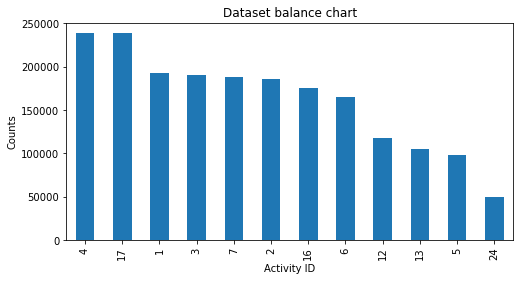

In [15]:
df['activityID'].value_counts().plot(kind = "bar",figsize = (8,4))  # number of records by Activity
plt.title("Dataset balance chart")
plt.xlabel("Activity ID")
plt.ylabel("Counts")
plt.show()

If we observe the above graph, the dataset is balanced, and then we can proceed with the dataset split. Dataset will be splitted to Train and Test set. To test and observe the data which has not been unseen, we will be carried out this dataset split. The most commonly used dataset split is 80%-20% for Train set and Test set respectively,, so we are taking these things into consideration.

In [16]:
from sklearn.utils import shuffle
df_shuffle = shuffle(df)
df_trainset = df_shuffle[:int(0.8*len(df_shuffle))]
df_testset = df_shuffle[int(0.8*len(df_shuffle)):]

In [17]:
df_trainset.describe().round(3) # With the help of describe() function, we will get all the statistics-related calculated values 

,timestamp,activityID,heart_rate,handtemperature,IMU_handAcc_16_X(ms-2),IMU_handAcc_16_Y(scale),IMU_handAcc_16_Z(resolution),IMU_handAcc_6_X(ms-2),IMU_handAcc_6_Y(scale),IMU_handAcc_6_Z(resolution),...,IMU_ankleAcc_6_X(ms-2),IMU_ankleAcc_6_Y(scale),IMU_ankleAcc_6_Z(resolution),IMU_ankleGyro_X,IMU_ankleGyro_Y,IMU_ankleGyro_Z,IMU_ankleMagneto_X,IMU_ankleMagneto_Y,IMU_ankleMagneto_Z,subjectID
count,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,...,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000
mean,1704.906,8.079,107.464,32.759,-4.932,3.580,3.609,-4.864,3.568,3.794,...,9.368,-0.044,-2.175,0.011,-0.037,0.008,-31.561,1.419,17.236,4.567
std,1093.601,6.174,8.154,1.786,6.211,6.873,3.948,6.215,6.561,3.936,...,6.058,7.181,3.467,1.125,0.636,2.007,18.306,21.636,19.685,2.333
min,31.200,1.000,57.000,24.875,-145.367,-104.301,-101.452,-61.215,-61.842,-61.935,...,-61.142,-61.904,-62.289,-14.162,-13.040,-13.270,-172.624,-137.908,-102.716,1.000
25%,743.960,3.000,107.469,31.688,-8.944,1.074,1.176,-8.842,1.072,1.380,...,8.412,-2.060,-3.395,-0.202,-0.105,-0.429,-41.663,-12.334,3.831,2.000
50%,1480.070,6.000,107.469,33.125,-5.376,3.549,3.468,-5.297,3.569,3.706,...,9.547,-0.211,-2.004,0.005,-0.004,-0.002,-33.879,0.941,18.605,5.000
75%,2663.790,13.000,107.469,34.062,-0.974,6.432,6.531,-0.921,6.441,6.776,...,10.261,1.907,-0.603,0.129,0.114,0.090,-17.922,17.777,31.162,7.000
max,4245.670,24.000,202.000,35.500,62.860,155.699,157.760,52.821,62.260,61.728,...,61.969,62.049,60.936,17.420,13.588,14.483,91.552,94.248,146.900,9.000


primarly we will focus on one variable i.e heart_rate variable so inorder to get clear understanding of this variable we can see the statstic values above in the table.

## 2.2 Heart rate variable 

We will focus on the Heart rate variable and get a clear understanding of this variable by plotting some distribution charts and descriptive statistics.

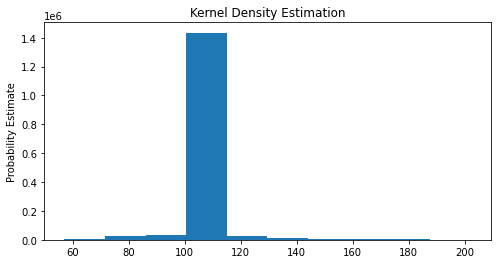

In [18]:
figure = plt.figure(2,figsize=(8,4)) # Plotting the heart rate distribution and probability estimate using KDE.
plt.hist(df_trainset['heart_rate'])
plt.title('Kernel Density Estimation')
plt.ylabel('Probability Estimate')
plt.show()

From the above distribution chart we can observe that the peaks are distributed between 100-120 BPM.And also from the above statistics table,we can see that the minimum heart rate is 57 and maximum heartrate is 202.In order to understand the outliers we can plot the box plot and analyse.

In [19]:
df_trainset.groupby('activityID').describe()['heart_rate'].round(3) # this will give us the Statistics values by Activities

,count,mean,std,min,25%,50%,75%,max
activityID,,,,,,,,
1,154379.0,104.546,9.748,57.000,107.469,107.469,107.469,115.0
2,148303.0,104.947,8.294,63.000,107.469,107.469,107.469,113.0
3,151592.0,105.734,6.246,68.000,107.469,107.469,107.469,112.0
4,191097.0,107.956,3.265,86.000,107.469,107.469,107.469,128.0
5,78425.0,111.891,15.640,81.000,107.469,107.469,107.469,196.0
6,131931.0,109.061,5.657,81.000,107.469,107.469,107.469,144.0
7,150483.0,108.962,5.767,78.000,107.469,107.469,107.469,147.0
12,93610.0,109.484,8.975,71.000,107.469,107.469,107.469,171.0
13,83878.0,109.468,9.373,78.000,107.469,107.469,107.469,175.0


Above table gives the all statistical significance values so we can use these for the next level analysis.

In [20]:
# Descriptive statistics:
descriptive_heart_rate = df_testset.groupby(['activityID'])['heart_rate'].describe()

activity_asc_index = descriptive_heart_rate['mean'].sort_values(ascending=False)
activity_heart_rate = []
for activity,ignore in activity_asc_index.iteritems():
    act = (df_testset[df_testset['activityID']==activity]['heart_rate'])
    activity_heart_rate.append(act)

import scipy.stats as sp
activity_heart_rate = []
for activity,ignore in activity_asc_index.iteritems():
    act = (df_testset[df_testset['activityID']==activity]['heart_rate'])
    activity_heart_rate.append(act)
sp.levene(activity_heart_rate[1],activity_heart_rate[4], center='mean')

LeveneResult(statistic=4324.72801854055, pvalue=0.0)

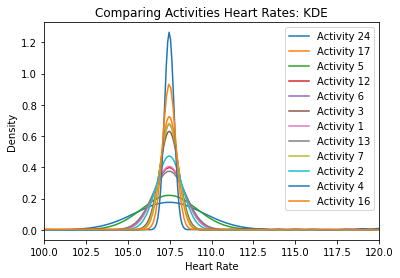

In [21]:
fig, ax = plt.subplots() #plotting line chart with multiple activities dimension
ax.set_xlim(100, 120)
for activity in df_trainset['activityID'].unique():
    s = df_trainset[df_trainset['activityID'] == activity]['heart_rate']
    s.plot.kde(ax=ax, label='Activity %i'%activity)
ax.legend()
plt.title('Comparing Activities Heart Rates: KDE')
plt.xlabel('Heart Rate')
plt.show()

As you see in the above chart via KDE, we can see various subgroups in the heart variable, which have a variety of different distributions and peaks. For example, we can take activity 4  have the highest peak between 105 to 110 BPM.

Text(0, 0.5, 'Heart rates')

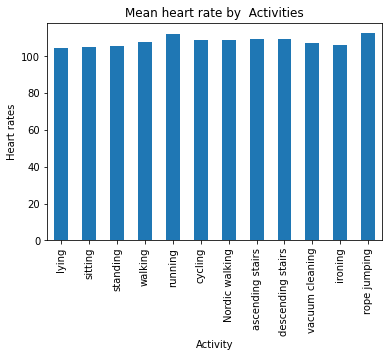

In [22]:
df_heartrateactivity=df_trainset['heart_rate'].groupby(df_trainset['activityID']).mean()  # Plotting mean heartrates by activities
df_heartrateactivity.index = df_heartrateactivity.index.map(activity_ID)
df_heartrateactivity.plot(kind='bar')
plt.title("Mean heart rate by  Activities")
plt.xlabel("Activity")
plt.ylabel("Heart rates")

If we observe the above graph, running and rope jumping will be complex activities since the mean heart rate is high. We can see that heart rate varies for each activity and thus serve as an indicator.

## 2.3 Temperature variable

We will take the temperature variable for our further analysis, so we will check the temperature for the body parts Ankle, Chest, and Hand. Plot the violin plot to see how the temperature distribution varies across the body parts.

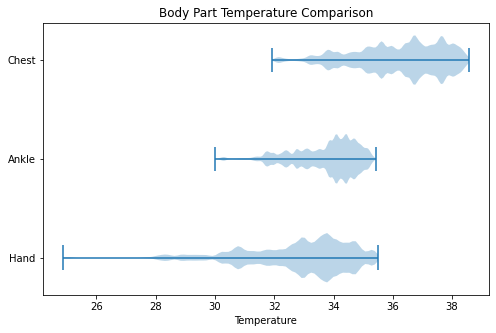

In [23]:
fig = plt.figure(5,figsize=(8,5))  #this code will plot Body part tempearture so we can compare between parts
ax = fig.add_subplot(1,1,1)
position = [1,2,3]
ax.violinplot([df_trainset['handtemperature']\
                ,df_trainset['ankletemperature']\
                ,df_trainset['chesttemperature']],position,vert=False)
ax.set_yticks(position)
ax.set_yticklabels(['Hand','Ankle','Chest'])
plt.title('Body Part Temperature Comparison')
plt.xlabel('Temperature')
plt.show()

From the above violin plots observation, Chest temperature has the higher value, and its range is between 32-38 as per the above plot. And if we see the Hand and Ankle temperature, it falls between 31-35. Hand and Chest temperatures are negatively skewed, but the ankle has less variation in this temperature variable. So if we observe the Hand and chest temperatures by activity in the form of linear regression ,will get to know how this is being performed based on activity.

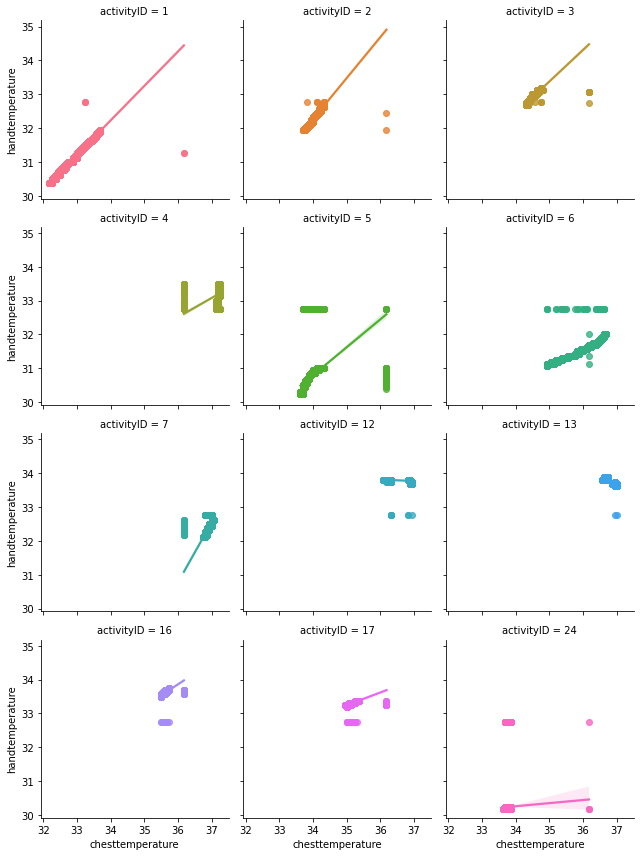

In [24]:
import seaborn as sns
subject1 = df[df['subjectID']==1] # Targeting on subject1 to get clear view
fig = sns.lmplot(x='chesttemperature', y="handtemperature", col="activityID", hue="activityID",data=subject1, col_wrap=3, height=3)
plt.show()

As can be seen from the above graphs, we can observe a high correlation between Chest and Hand temperatures. If we hypothesize based on the above evidence that there is an overall positive relationship between chest and hand temperature.

## 2.4 Acceleration variable

We will be taking the following variable: Acceleration, which involves all three body parts: Ankle, Hand, and Chest. In addition, to compare these body parts distribution over Acceleration, we will plot the violin chart.

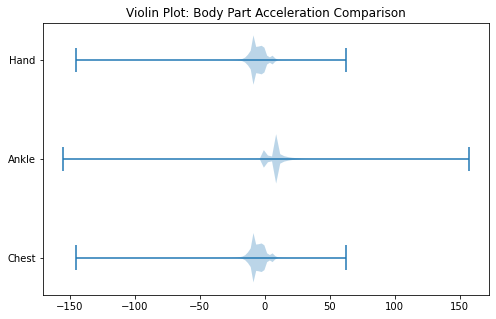

In [25]:
fig = plt.figure(5,figsize=(8,5))        #this code will plot Body part acceleration so we can compare between parts
ax = fig.add_subplot(1,1,1)
position = [1,2,3]
ax.violinplot([df_trainset['IMU_handAcc_16_X(ms-2)']\
                ,df_trainset['IMU_ankleAcc_16_X(ms-2)']\
                ,df_trainset['IMU_handAcc_16_X(ms-2)']],position,vert=False)
ax.set_yticks(position)
ax.set_yticklabels(['Chest','Ankle','Hand'])
plt.title('Violin Plot: Body Part Acceleration Comparison')
plt.show()

If we observe the above plot, Ankle acceleration has the highest average measure, with hand and chest having the least. It appears to be a relatively small variance for the Ankle, although the Hand and Chest are positively skewed.

Let's see the acceleration distribution for each activity by plotting the line chart below.

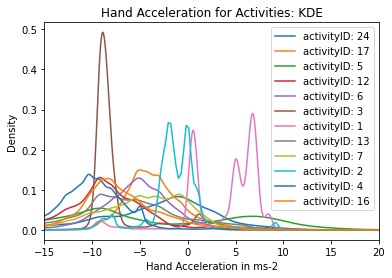

In [26]:
def kde(variable,xmin,xmax,title,xlabel,grouping): #function to plot KDE 
    fig, ax = plt.subplots()
    ax.set_xlim(xmin,xmax)
    for group in df_trainset[grouping].unique():
        s = df_trainset[df_trainset['activityID'] == group][variable]
        s.plot.kde(ax=ax, label='%s: %i'%(grouping,group))
    ax.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()
    return
kde('IMU_handAcc_16_X(ms-2)',-15,20,'Hand Acceleration for Activities: KDE','Hand Acceleration in ms-2','activityID') # KDE aginst hand acceleration

If we observe the mean hand acceleration from above plot, activities are not so similar, with some activities sharing similarities but others deviating away as you can see the activityId 3.

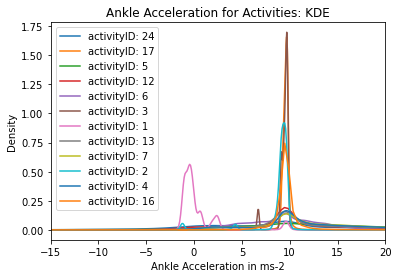

In [27]:
kde('IMU_ankleAcc_16_X(ms-2)',-15,20,'Ankle Acceleration for Activities: KDE','Ankle Acceleration in ms-2','activityID') # KDE aginst ankle acceleration

For the above Ankle plot , most of the activities have similar mean; however, if we observe activity 1 it is drastically and distinctly lower for mean acceleration.

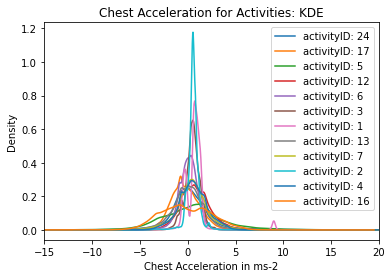

In [28]:
kde('IMU_chestAcc_16_X(ms-2)',-15,20,'Chest Acceleration for Activities: KDE','Chest Acceleration in ms-2','activityID')# KDE aginst chest acceleration

Finally if we are observing the chest part acceleration from the above plot, Activity 2 has the highest density around its mean value with a corresponding smaller variance.

The outcome of these charts of Hand, Ankle, and Chest. Chest Acceleration for each activity appears to be relatively similar.

In [29]:
df_trainset.describe().round(3) # With the help of describe() function, we will get all the statistics-related calculated values 

,timestamp,activityID,heart_rate,handtemperature,IMU_handAcc_16_X(ms-2),IMU_handAcc_16_Y(scale),IMU_handAcc_16_Z(resolution),IMU_handAcc_6_X(ms-2),IMU_handAcc_6_Y(scale),IMU_handAcc_6_Z(resolution),...,IMU_ankleAcc_6_X(ms-2),IMU_ankleAcc_6_Y(scale),IMU_ankleAcc_6_Z(resolution),IMU_ankleGyro_X,IMU_ankleGyro_Y,IMU_ankleGyro_Z,IMU_ankleMagneto_X,IMU_ankleMagneto_Y,IMU_ankleMagneto_Z,subjectID
count,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,...,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000
mean,1704.906,8.079,107.464,32.759,-4.932,3.580,3.609,-4.864,3.568,3.794,...,9.368,-0.044,-2.175,0.011,-0.037,0.008,-31.561,1.419,17.236,4.567
std,1093.601,6.174,8.154,1.786,6.211,6.873,3.948,6.215,6.561,3.936,...,6.058,7.181,3.467,1.125,0.636,2.007,18.306,21.636,19.685,2.333
min,31.200,1.000,57.000,24.875,-145.367,-104.301,-101.452,-61.215,-61.842,-61.935,...,-61.142,-61.904,-62.289,-14.162,-13.040,-13.270,-172.624,-137.908,-102.716,1.000
25%,743.960,3.000,107.469,31.688,-8.944,1.074,1.176,-8.842,1.072,1.380,...,8.412,-2.060,-3.395,-0.202,-0.105,-0.429,-41.663,-12.334,3.831,2.000
50%,1480.070,6.000,107.469,33.125,-5.376,3.549,3.468,-5.297,3.569,3.706,...,9.547,-0.211,-2.004,0.005,-0.004,-0.002,-33.879,0.941,18.605,5.000
75%,2663.790,13.000,107.469,34.062,-0.974,6.432,6.531,-0.921,6.441,6.776,...,10.261,1.907,-0.603,0.129,0.114,0.090,-17.922,17.777,31.162,7.000
max,4245.670,24.000,202.000,35.500,62.860,155.699,157.760,52.821,62.260,61.728,...,61.969,62.049,60.936,17.420,13.588,14.483,91.552,94.248,146.900,9.000


Above statistics related data table will be used for the hypothesis testing below.

# 3.Hypothesis Testing:

The Descriptive Statistics table helps to understand the statistics-related calculations for the taken samples on which we can perform hypothesis testing.

Hypothesis1:

"If heart rates are dependent on activities, then the complex activities will have high heart rates"

Here we have two variables on this natural hypothesis those are heart rates and activities.

Null Hypothesis,𝐻0 : activities has no effect on heart rates. 𝐻0: Assumed mean μ=105

Alternative Hypothesis,H1 : activities has effect on heart rates. 𝐻1: Assumed mean μ≥105

N=1554297   𝑋̅(sample mean)=107.465  std=8.154

To test this hypothesis, we need a probability value to standardize the thesis, and the p-value has a critical level value equal to 0.05. If the p-value is less than or equal to 0.05, we reject the null hypothesis and accept the alternative hypothesis. So to calculate the p-value, we have to perform the Z test and find the Z value.

with the above values, we can find the Z values and i.e  Z≥376.88.
Calculating the p-value based on the Z value below

In [30]:
#hypothesis test,finding p value
from scipy import stats
p_value=1-stats.norm.cdf(376.88)
print("p value correspanding to z greater or equal to 376.88 is ", p_value)

p value correspanding to z greater or equal to 376.88 is  0.0


The p-value for the Z =376.88 is 0.0, and this p-value is actually P ≤ 0.05; hence we will be rejecting the null hypothesis and accepting the alternative hypothesis, which means doing more complex activities impact high heart rates.

Hypothesis2:

We can make a hypothesis based on the linear regression plotted on the hand temperature and chest temperature correlation.

"If Hand temperature and chest temperature are related, then the correlation between hand and chest temperature is high."

Null Hypothesis,𝐻0: Hand temperature and chest temperature are not correlated: slope co efficient=0 

Alternative Hypothesis, H1: Hand temperature and chest temperature are correlated: slope co-efficient!=0 

To test this Hypothesis, the linear regression model will opt and if we get a probability value less than the standard p-value of 0.05, then we reject the Null Hypothesis; otherwise, we choose an alternative Hypothesis. Let's find out the p-value to do the hypothesis test.

In [31]:
fit = sp.linregress(df_testset['handtemperature'],df_testset['chesttemperature'])
fit

LinregressResult(slope=0.6303522591875469, intercept=15.529290727055017, rvalue=0.7546571305295378, pvalue=0.0, stderr=0.0008791848111439576, intercept_stderr=0.02883938565319754)

We got the p-value 0 which means this value is less than the standard p-value of 0.05, so we rejecting the null hypothesis and accepting the alternative hypothesis such that there is a relation between the chest temperature and hand temperature.

# 4. Predictive Modeling:

This analysis will mainly focus on developing a model to make predictions using multiple attributes within the dataset available. The model which we are going to build will assume the target value can be approximated with the help of a Linear combination of the input features.

Dependent variable=Independent Variable*B1 + Independent Variable B2 +C + e

This will be achieved through  Multi Linear Regression. We estimate the values or numbers(B1 and B2) to multiply with the independent variable and add two more parameters, like Constant(C) and random error term(e), to the expression. And the random error term is mainly for the random fluctuations which we are not able to forecast.This model will give us a good approximation and provide the instinctive interpretation with the help of the the dependent and independent variables.



## 4.1 Predicting the Heart Rate:

To build this model, we will be using the variable called Hear rate. We know the regression depends on the linear relationship; the strongest correlation variables are the best for the model; either way, we can say the weakest negative correlation is the best suited for the model.

In [32]:
print('Top Heart Rate Correlations: ')
df_trainset.corr()['heart_rate'].sort_values(ascending=False)[0:3]  #Heart rate correlation

Top Heart Rate Correlations: 


heart_rate            1.000000
timestamp             0.236203
IMU_chestMagneto_Z    0.135981
Name: heart_rate, dtype: float64

In [33]:
from sklearn import linear_model
def linear_regression(train,test,target_variable,variable1,variable2):  # Function which returns the coefficeints of a Linear-Regression fit and R^2 coefficent
    x_train= train.loc[:,[variable1,variable2]]
    y_train = train.loc[:,[target_variable]]
    x_test = test.loc[:,[variable1,variable2]]
    y_test = test.loc[:,[target_variable]]
    regression_instance = linear_model.LinearRegression().fit(x_train,y_train)
    coefficients = regression_instance.coef_.tolist()
    intercept = int(regression_instance.intercept_)
    train_score = regression_instance.score(x_train,y_train)
    test_score = regression_instance.score(x_test,y_test)
    return coefficients, intercept, train_score, test_score, regression_instance

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def predictive_model(train,test,target_variable,variable1,variable2,fig_no): #function to call liner_regression function and plot the model and scatter plot.
    coefficients, intercept, train_score, test_score, regression_instance = linear_regression(train,test,target_variable,variable1,variable2)
    xvalues = np.linspace(df[variable1].min(),df[variable1].max(),100)
    yvalues = np.linspace(df[variable2].min(),df[variable2].max(),100)
    xx,yy = np.meshgrid(xvalues,yvalues)
    onlyX = pd.DataFrame({variable1: xx.ravel(), variable2: yy.ravel()})
    zz = np.array(intercept) + np.array(coefficients[0][0]) * xx + np.array(coefficients[0][1]) * yy
    fig=plt.figure(fig_no,figsize=(10,10))
    ad = fig.add_subplot(111, projection='3d')
    ad.plot_surface(xx,yy,zz.reshape(xx.shape),cmap=plt.cm.RdBu_r, alpha=0.6,linewidth=3) # Plot model landscape
    ad.scatter(train[variable1][:1000],train[variable2][:1000],train[target_variable][:1000],color='Yellow',label='Training Data') # Plot training data points
    ad.scatter(test[variable1][:1000],test[variable2][:1000],test[target_variable][:1000],color='Black',label='Testing Data') # Plot testing data points
    ad.set_xlabel('%s'%variable1)
    ad.set_ylabel('%s'%variable2)
    ad.set_zlabel("%s"%target_variable)
    plt.legend(loc='upper right', numpoints=1, ncol=4, fontsize=7.5, bbox_to_anchor=(0, 0))
    plt.title('Linear Regression \n Estimated model: %s = %.3f x %s + %.3f x %s+ %.3f' % (target_variable,coefficients[0][0],variable1,coefficients[0][1],variable2,intercept))
    plt.show()
    return coefficients, intercept, train_score, test_score, regression_instance

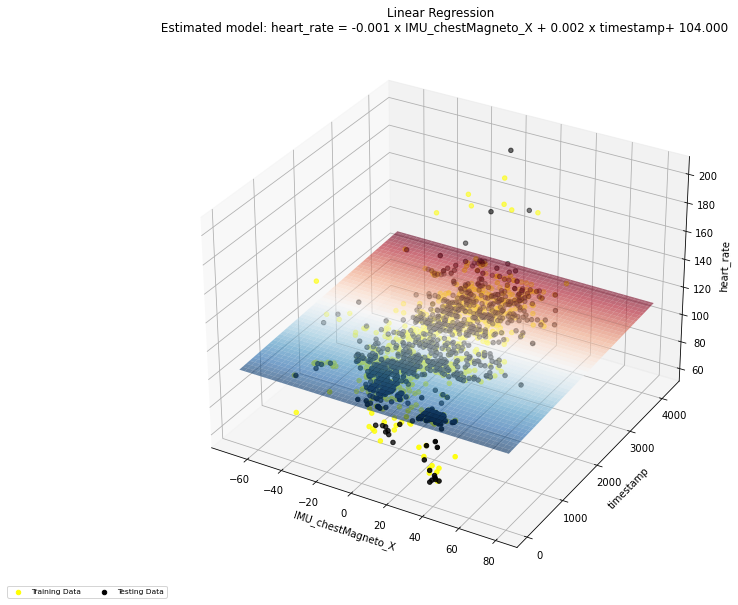

In [35]:
model1 = predictive_model(df_trainset,df_testset,'heart_rate','IMU_chestMagneto_X','timestamp',12)

If we observe the above 3D plot model,this model appears to fit the data points relatively well apart from the lower and upper tails. This model may be better suited to a Quadratic fit.

## 4.2 Predicting the Chest Temperature:

As like above method,we can apply the same here to predicting the chest temperature.

In [36]:
print('Top Chest Temperature Correlations:')
df_trainset.corr()['chesttemperature'].sort_values(ascending=False)[0:3]

Top Chest Temperature Correlations:


chesttemperature    1.000000
handtemperature     0.754261
ankletemperature    0.547211
Name: chesttemperature, dtype: float64

With the above observation of variables,we can train the model which allow us to minimise the squared errors.With this now we can plot the model along with the hyperplane result.

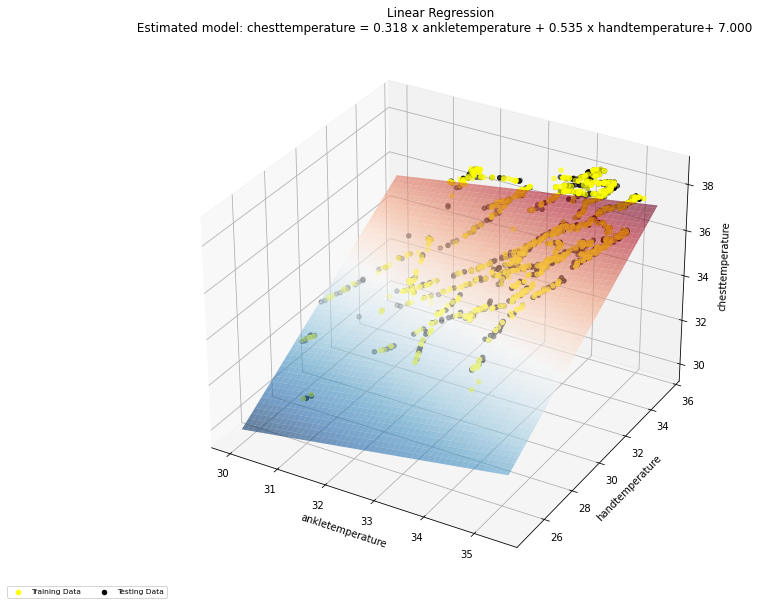

In [37]:
model2 = predictive_model(df_trainset,df_testset,'chesttemperature','ankletemperature','handtemperature',11)

As we observe in the above plot, all the points are relatively good degrees. In the next module evaluation part, we can discuss the quantified data it holds. After this, we will be continued with the developed model evaluation quantitatively, and we will see the performance of both models. Then lets proceed with the model evaluation below.

## 4.3 Model Evaluation:

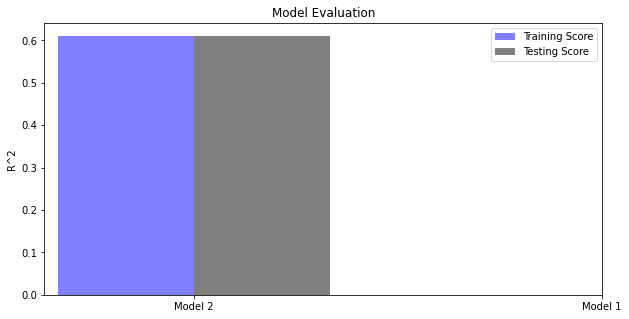

In [38]:
models = [model2,model2]
def model_evaluation(models): #functions to plot the testing and traing score for each model
    figure = plt.figure(7,figsize=(10,5))
    ax = figure.add_subplot(111)
    j = 1
    e = 2
    for i in models:
        ax.bar([j],i[2],1,color='blue',alpha=0.5)
        ax.bar([e],i[3],1,color='black',alpha=0.5)
        plt.legend(['Training Score','Testing Score'])
        j += 3
        e += 3
        plt.title('Model Evaluation')
        plt.ylabel('R^2')
        ax.set_xticks([1.5 + (3*i) for i in range(len(models))])
        ax.set_xticklabels(['Model 2','Model 1'])
        plt.show()
        return
model_evaluation(models)

Quantitatively evaluating both models, we can observe that they both performed similarly, and it has a 60% variation in the variable. And also, the testing score and training score is very close in both models. This result shows that our models are good at generalizing to new data rather than overfitting the data.

## Predictive Modelling based on Activity:

In this part, we will analyze the variable activityID to predict what activity is performed based on unlabelled data. A precise class of activities will have commercial viability since gadgets will automatically record data that may not explicitly notify the device what activity is being performed.
Hence, if we use alternative measures this benefits the commercial reaching as well, so this will target the individual by advertising the specific activity preference.

Next step is to process the data because we have a large dimensionality of the data set.

We will use Principal Component Analysis(PCA) to process the large dimensionality of the data set. PCA will support us in selecting the model for classification since it can provide a low-dimensional representation of our data set.This can be done by standardizing the data to 0 center and responsible for units differing between variables. The PCA finds the most variation components/axes in the data set, which gives us the largest eigenvalues within the dataset covariance matrix. Data is then transformed to new axes where the number of components used is a hyperparameter to be chosen. All the activities are performed sequentially, and also timestamps will vary for all that specific activities. There will be no doubt in improving the classification performance however timestamp column will be removed from the analysis since this characteristic will not have an impact in a real-world setting.

Now we can assess the correlation with our dataset by plotting the heat map so will get to know wheather we need to whiten the data or not. Let us visualize the heatmap of the correlation below.


Text(0.5, 1.0, 'Variable Correlation: Heatmap')

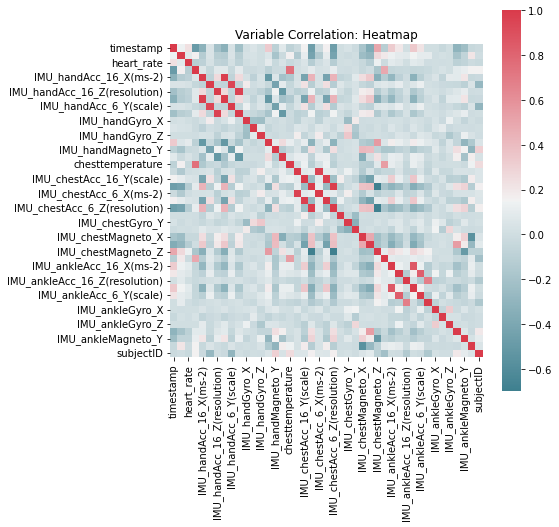

In [39]:
corr = df_trainset.corr()
# observe scatter_matrix
import numpy as np
import seaborn as sns
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(215, 9, as_cmap=True),square=True, ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Variable Correlation: Heatmap')

If we observe the above heat map,its very clear that there are lot of correlation feature within the dataset so PCA will be performed with Whitening preprocessing.

In [40]:
def model_drop(df): # this function will filter the dataframe for the feature inputs and targets
    Y = df['activityID'] # set Y to the activity labels
    X = df.drop(['activityID'], axis=1) # remove the activity labels for X
    X = X.drop(['timestamp'],axis=1) # remove the timestamp
    return X,Y

Data visualization below represents with the first three principle components grouped by activity in a different shades.

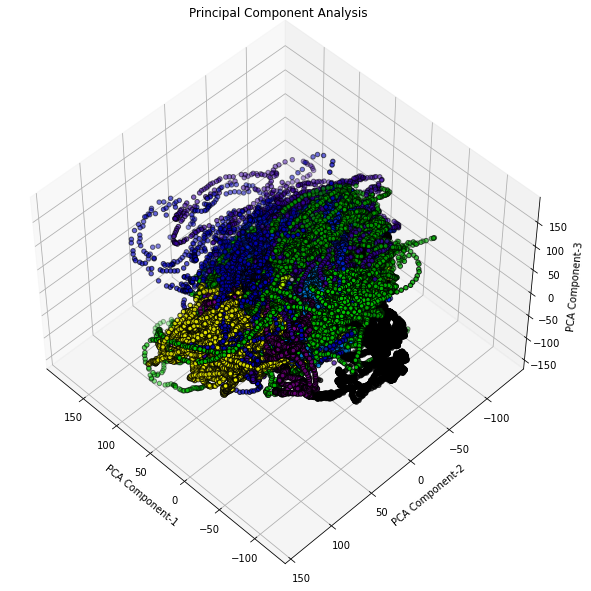

In [41]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets


X,y = model_drop(df_trainset)
fig = plt.figure(14, figsize=(8, 8))
plt.clf() # clear figure
ad = Axes3D(fig, rect=[0, 0, .94, 1], elev=49, azim=135)
plt.cla() # clear axis
pca = decomposition.PCA(n_components=3, whiten=False) # create PCA instance
pca.fit(X) # fit pca
X = pca.transform(X) # PCA fit
ad.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,cmap=plt.cm.nipy_spectral,edgecolor='k') # plotting the PCA transformed points
ad.set_xlabel('PCA Component-1')
ad.set_ylabel('PCA Component-2')
ad.set_zlabel('PCA Component-3')
plt.title('Principal Component Analysis')
plt.show()

From the above representation, activities are loosely clustered with themselves. We can also discover that a Linear model which depends on the linear decision boundary. For instance, if we observe the light green and light blue, we can take the Logistic Regression is may not be appropriate since some cases are not linearly separable. So we will be performing the K Nearest Neighbours(KNN) classification.
KNN is a classification methodology that does not rely on building an internal model with the data; hence, it is categorized as a non-parametric model. Instead, K Nearest Neighbours stores the training instances in terms of their Euclidean positions and classifies unlabelled training points based on their K nearest neighbours. So, for example, if we chose K to be 4, and the 4 closest activities to this unlabelled data point were: 1, 1, 2, 3 - the KNN classifier would classify this point as 1 as 1 is the most common activity for those four neighbours (majority voting). This process is hence repeated for every testing instance. The advantage of this methodology is that it does not make any assumptions about the functional form of the data and is inherently multinomial, which is convenient given that we have 12 activities to classify.

Hyperparameter Optimisation:

Generally, if we have a higher K then we will get the more generalized model since it takes a more significant proportion of euclidean space into consideration, and if we have a lower K then the classifier becomes more sensitive to variation inside the dataset and can overfit.

To demonstrate this, we can plot the graph on the decision boundary of the KNN algorithm using the first two principle components for higher K values.

In [42]:
# import required packages
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

def model_training(X,y,n_components,n_neighbors):
    pca = decomposition.PCA(n_components=n_components, whiten=True) # create PCA instance with given parameters
    pca.fit(X) # fit PCA
    X = pca.transform(X) # PCA fit
    knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors) # KNN instance
    classifier=knn.fit(X,y) # fitting knn model
    return classifier,X,pca

In [43]:
def decision_boundary(classifier,title,X,y,figure,subplot_no):
    h = 0.1
    id_x = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(id_x)
    X = X[id_x]
    Y = np.array(y)[id_x]
    figure.add_subplot(subplot_no)
    # Plot 1000 random points (to avoid crowd data)
    X = X[:100]
    Y = y[:100]
    # mesh plot
    X_MIN, X_MAX = X[:, 0].min() - 1, X[:, 0].max() + 1
    Y_MIN, Y_MAX = X[:, 1].min() - 1, X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.arange(X_MIN, X_MAX, h),np.arange(Y_MIN, Y_MAX, h))
    Z = classifier.predict(np.c_[XX.ravel(), YY.ravel()])
    # plotting the result below
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)
    plt.axis('tight')
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)  # Plot training points
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    return

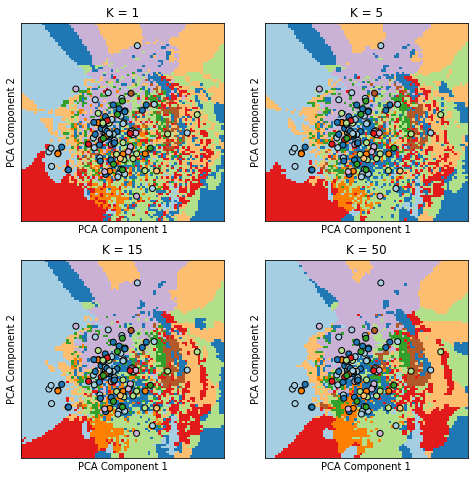

In [44]:
k = [1,5,15,50] # K neighbor parameters for the trial
j = 221
figure = plt.figure(16,figsize=(8,8))
X,y = model_drop(df_trainset)
for i in k:
    classifier,X = model_training(X,y,2,i)[:2] # train classifier for each k value
    decision_boundary(classifier,'K = %i'%i,X,y,figure,j) # plting the decision boundary
    j += 1
plt.show()

By looking into the above decision boundary plots, when K=1 then the decision boundary is very erratic.

From observing the decision boundary plots above, we can see that when K = 1, the decision boundary is very inconsistent and extremely sensitive to the local data points. If we increase the K value and observe from K=1 and K=50, then the decision boundary becomes more generalized and resistant to local class labels.

So based on the above observations, it clearly states that choosing the right K value is vital for accurate classification. Hence the next step, we will be focussing on the optimization of this parameter along with the number of principle components.

To perform this, we need the number of principle components and  Nearest Neighbours. We will experiment with these two over a range of values, which will be validated or tested using the Cross-validation procedure with two folds.
The number of principle components, this been chosen as a hyperparameter, then the PCA fit transform. Therefore, these have been included within the data pipeline to train each fold.

To be precise, we will split the training data into two folds, each taking the left-out training and testing set. First, the data will be fitted with the model for the training set, and then this model will be validated on the left-out set. Then, using two turns, the testing score will be averaged and represents the ratio of correct activities classified. This methodology will minimize the risk that we will optimize hyperparameters based on overfitting patterns, so this methodology will be chosen.


In [45]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# knn and pca instances reinitialzation
pca = decomposition.PCA(n_components=2, whiten=True)
knn = neighbors.KNeighborsClassifier()
# data pipeline
pipe = Pipeline([('reduce_dim', pca),('classify', knn)])
# # parameter grid of the range of hyperparameters
parameter_grid = [{'classify__n_neighbors': [4,7,9],'reduce_dim__n_components':[3,6,9]}]

X,y = model_drop(df_trainset)
grid = GridSearchCV(pipe, cv=2, n_jobs=2, param_grid=parameter_grid)
grid.fit(X, y)
print('Best Score= ',grid.best_score_)
print('Best Estimator= ',grid.best_params_)

Best Score=  0.9803004188097091
Best Estimator=  {'classify__n_neighbors': 4, 'reduce_dim__n_components': 9}


Based on the result of the Cross-Validation Grid search, the best parameter we found is when the number for Neighbours is fixed to 4 and the number for Principle Components is set to 9. We have searched over a small subset of parameters, so we need to keep note; hence this is exceptionally probable we are within the local set. If we want to do any research in the future, then we should consider the greater range of parameters for the experiment.

In [46]:
classifier,X,pca = model_training(X,y,4,9) # updating the model with best estimator
X_test,y_test = model_drop(df_testset) # correct testing format
X_test = pca.transform(X_test) # PCA transform
classifier.predict(X_test) # testing data prediction
print('Testing Accuracy: ', classifier.score(X_test,y_test)) # testing score

Testing Accuracy:  0.8536370070128032


We can see that we have an overall accuracy of 85%. This implies that our model can correctly predict which activity is being performed on an unseen and unlabelled data set 85% of the time.

We can observe that the heart rate, activity, and chest temperature are the main features of physical activity. During the activities, chest temperature showed a strong correlation with heart rate. Heart rate is affected by temperature changes and activities performed. So we can improve the health benefits of an individual by recording and processing the activity data with the help of hardware and software.